In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D
from keras.datasets import cifar10

In [2]:
def plot_cumulative_explained_variance(pca, dataset_name, n_components):
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Cumulative Explained Variance ({dataset_name}, {n_components} Components)')
    plt.show()

In [3]:
def plot_variance_explained(pca, n_components):
    df_sns = pd.DataFrame({'var': pca.explained_variance_ratio_, 'PC': [f'PC{i+1}' for i in range(n_components)]})
    sns.barplot(x='PC', y='var', data=df_sns, color='c')
    plt.ylabel('Variance Explained')
    plt.xlabel('Principal Components')
    plt.title(f'Variance Explained by Principal Components ({n_components} Components)')
    plt.show()

In [4]:
def plot_information_lost(pca, dataset_name, n_components):
    information_lost = 1 - np.cumsum(pca.explained_variance_ratio_)
    df_info_lost = pd.DataFrame({'information_lost': information_lost, 'Case': [f'Case {n_components}' for _ in range(n_components)]})
    sns.barplot(x='Case', y='information_lost', data=df_info_lost, color='m')
    plt.ylabel('Information Lost')
    plt.xlabel('Cases')
    plt.title(f'Information Lost in Each Case ({dataset_name}, {n_components} Components)')
    plt.show()

In [5]:
def plot_pca_results(x_pca, labels, dataset_name, n_components):
    if n_components == 2:
        plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', alpha=0.8)
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.title(f'PCA of {dataset_name} Dataset ({n_components} Components)')
        plt.show()
    elif n_components == 3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=labels, cmap='viridis', marker='o', alpha=0.8)
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
        plt.title(f'PCA of {dataset_name} Dataset ({n_components} Components)')
        plt.show()
    else:
        for i in range(3, n_components + 1):
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, i-1], c=labels, cmap='viridis', marker='o', alpha=0.8)
            ax.set_xlabel('Principal Component 1')
            ax.set_ylabel('Principal Component 2')
            ax.set_zlabel(f'Principal Component {i}')
            plt.title(f'PCA of {dataset_name} Dataset ({n_components} Components)')
            plt.show()

In [6]:
breast_cancer = load_breast_cancer()
data_bc = breast_cancer.data
y_bc = breast_cancer.target

In [7]:
(x_train, y_train), (_, _) = cifar10.load_data()
n_samples_cifar = len(x_train)
data_cifar = x_train.reshape(n_samples_cifar, -1).astype('float32') / 255.0

In [8]:
datasets = [(data_bc, y_bc, 'Breast Cancer'), (data_cifar, y_train.flatten(), 'CIFAR-10')]


Dataset: Breast Cancer, Number of Components: 2
Variance ratio: [0.98204467 0.01617649]
Sum: 0.9982211613741728


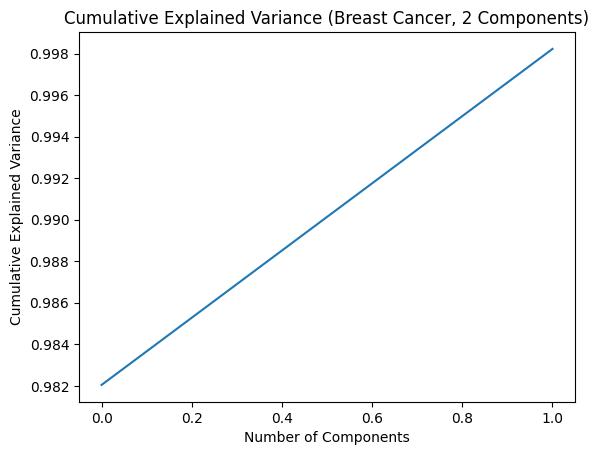

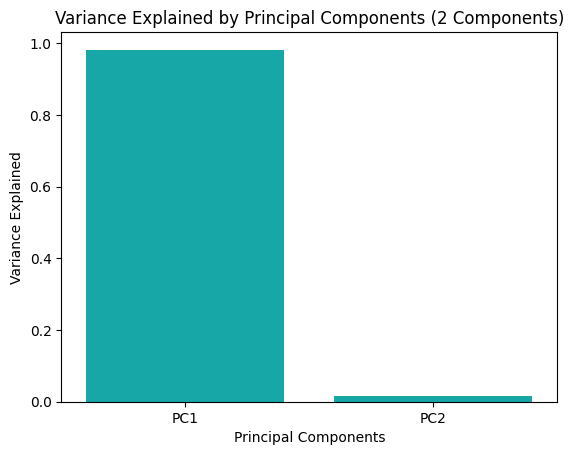

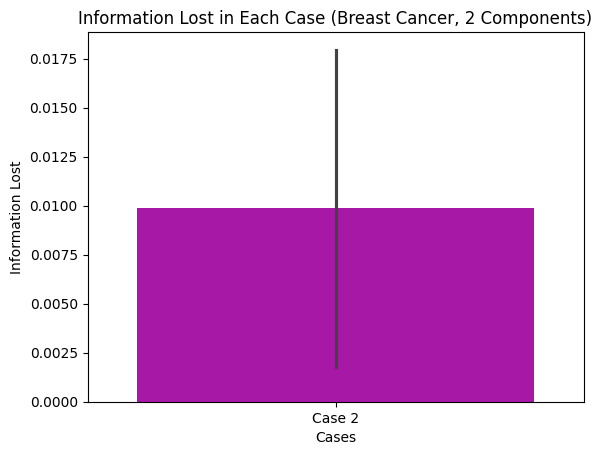

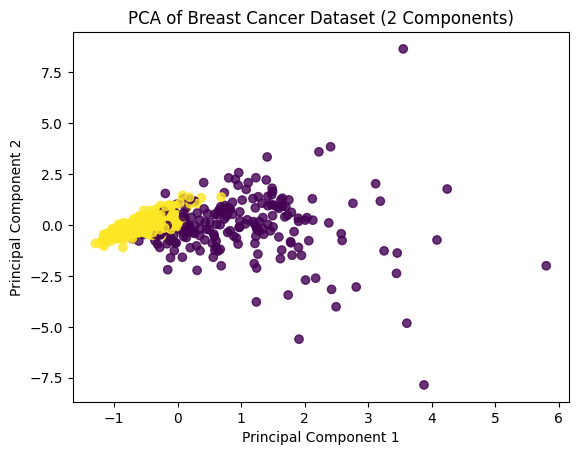


Dataset: Breast Cancer, Number of Components: 3
Variance ratio: [0.98204467 0.01617649 0.00155751]
Sum: 0.9997786721191873


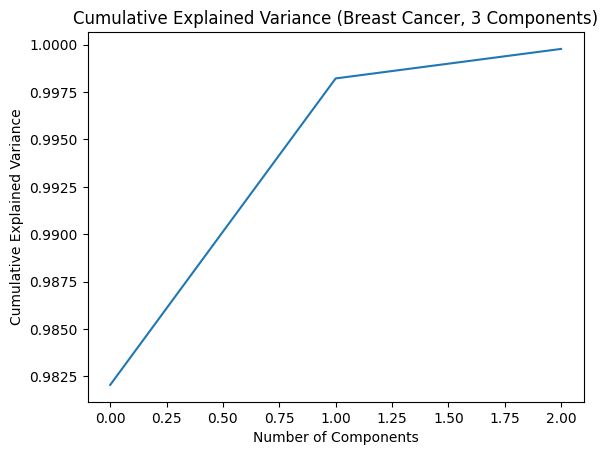

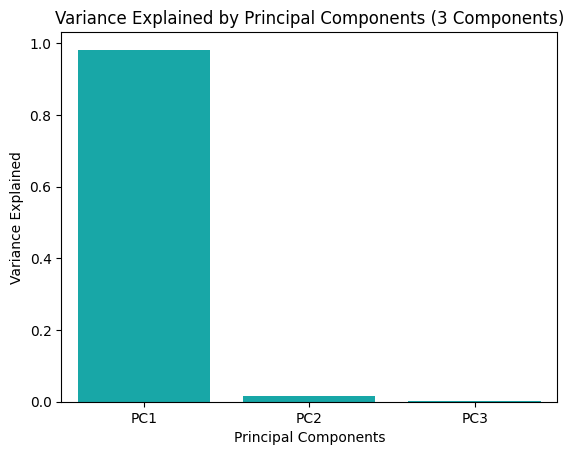

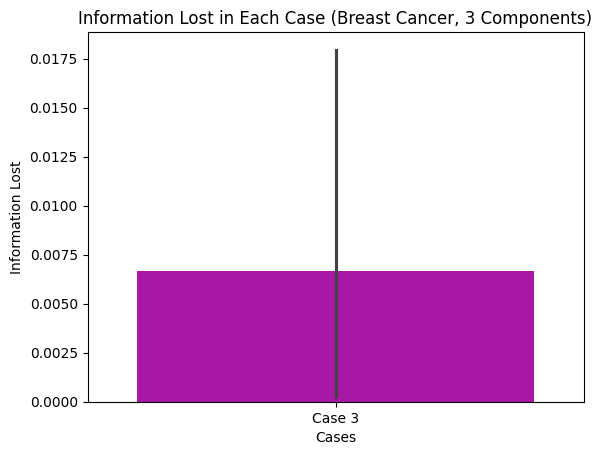

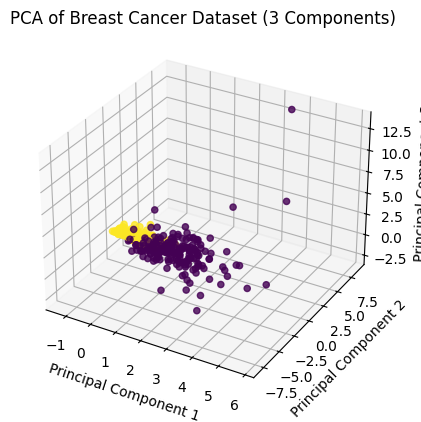


Dataset: Breast Cancer, Number of Components: 4
Variance ratio: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04]
Sum: 0.9998996040827282


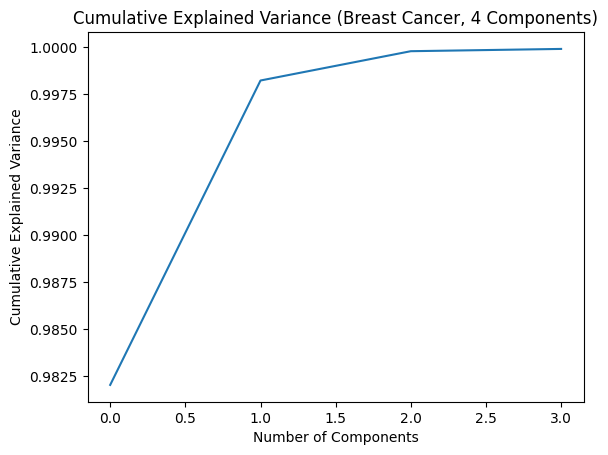

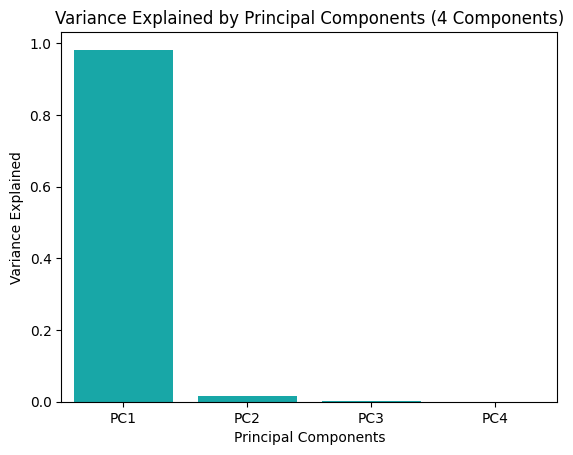

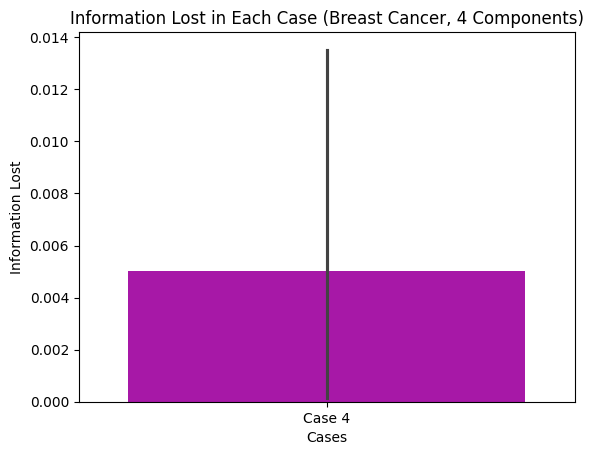

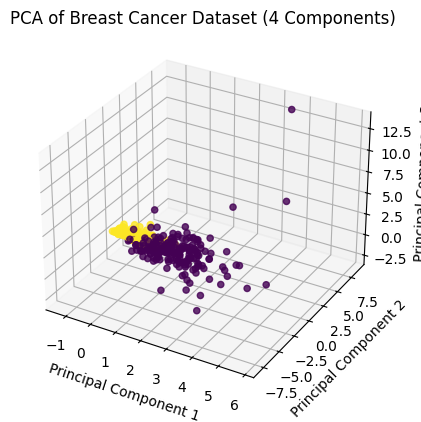

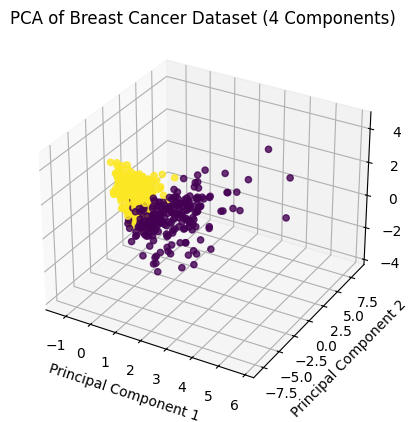


Dataset: Breast Cancer, Number of Components: 5
Variance ratio: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05]
Sum: 0.9999878765363127


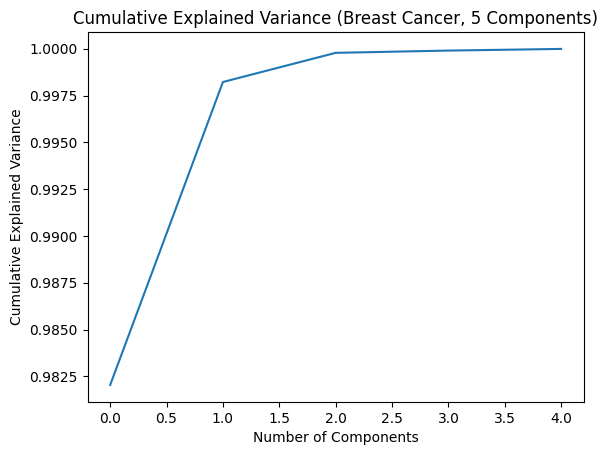

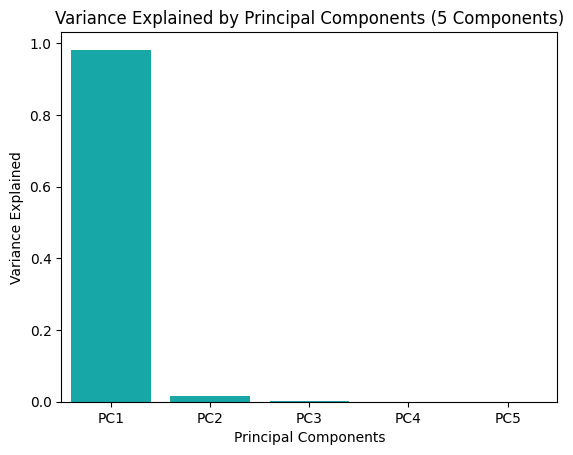

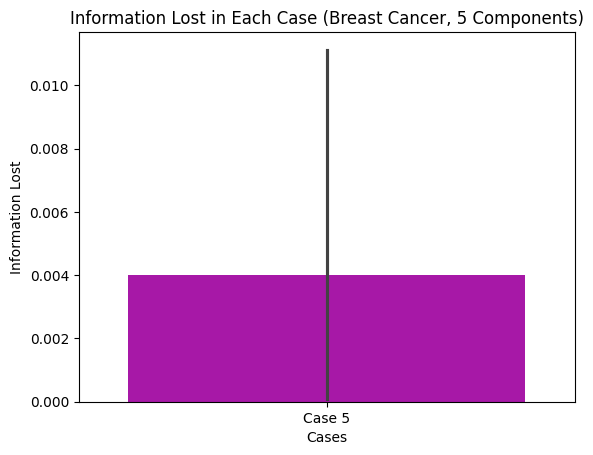

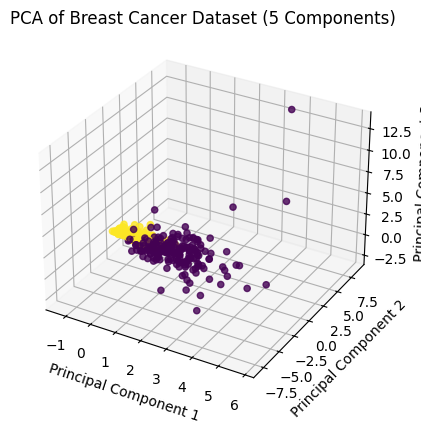

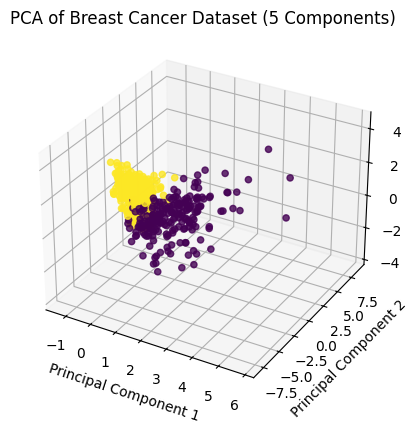

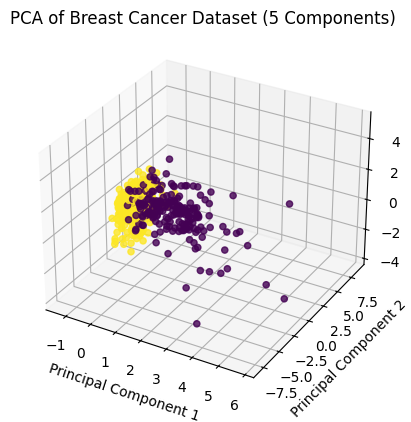


Dataset: CIFAR-10, Number of Components: 2
Variance ratio: [0.2907683  0.11253263]
Sum: 0.4033009260892868


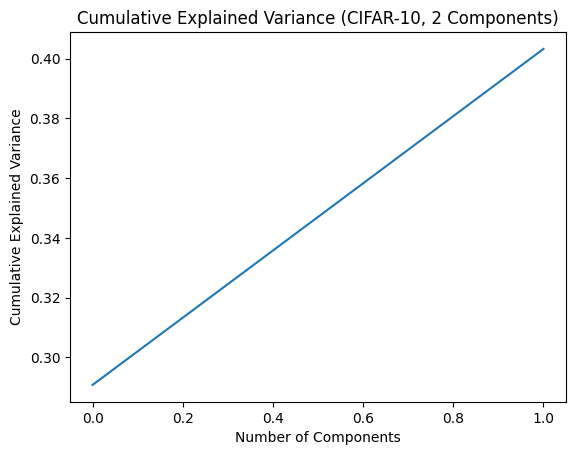

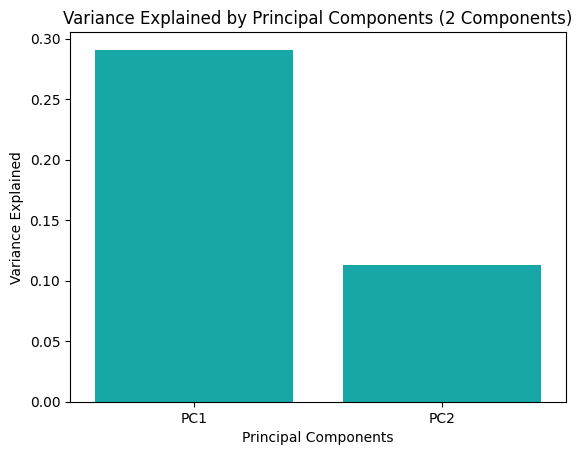

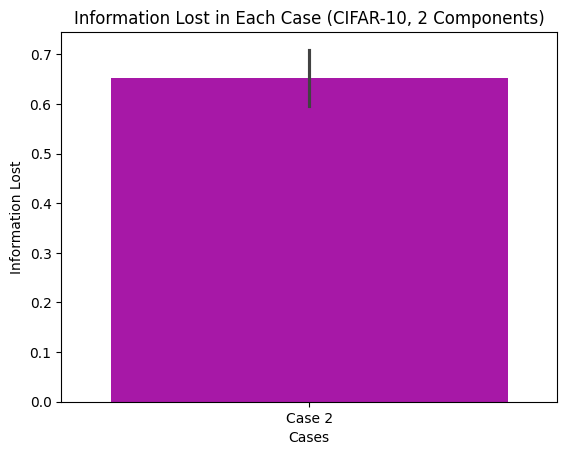

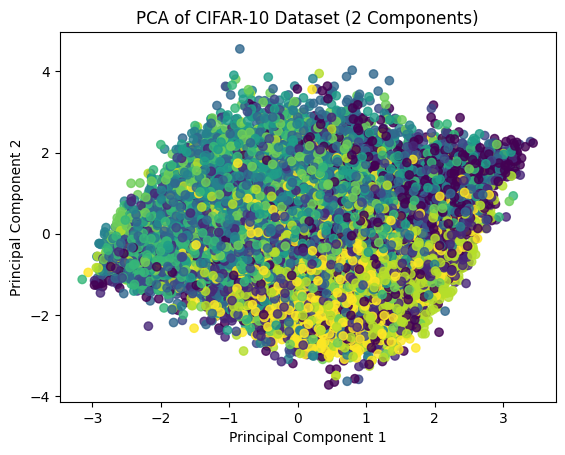


Dataset: CIFAR-10, Number of Components: 3
Variance ratio: [0.2907706 0.1125328 0.0669447]
Sum: 0.4702480882406235


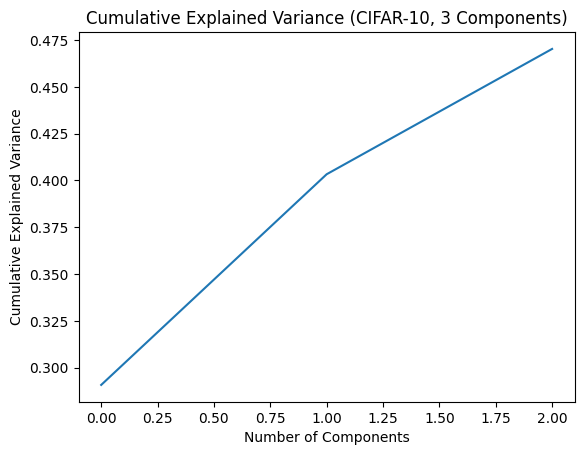

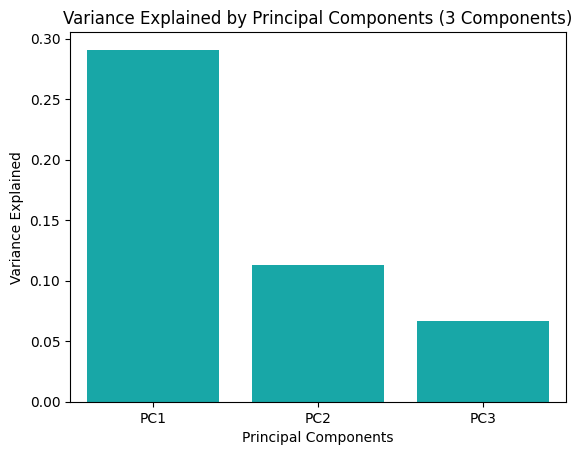

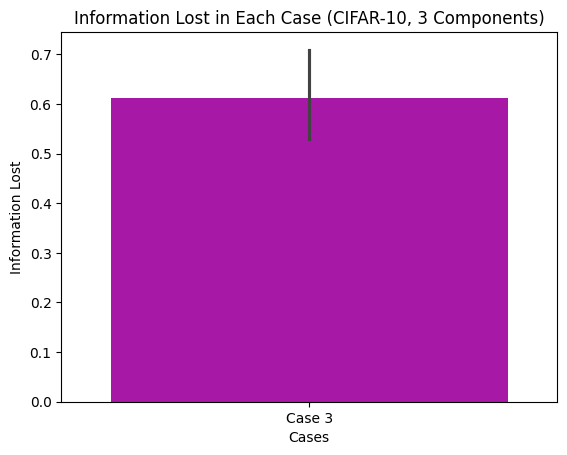

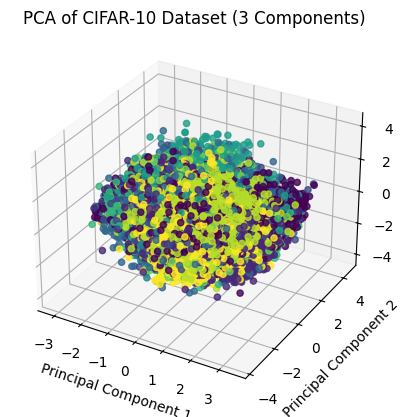


Dataset: CIFAR-10, Number of Components: 4
Variance ratio: [0.29076862 0.1125325  0.06694516 0.03676495]
Sum: 0.5070112310349941


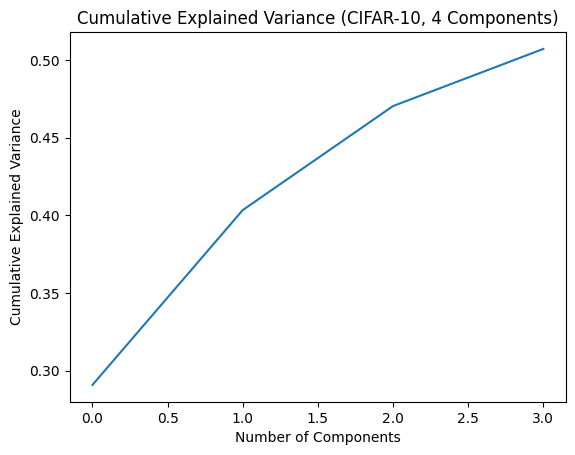

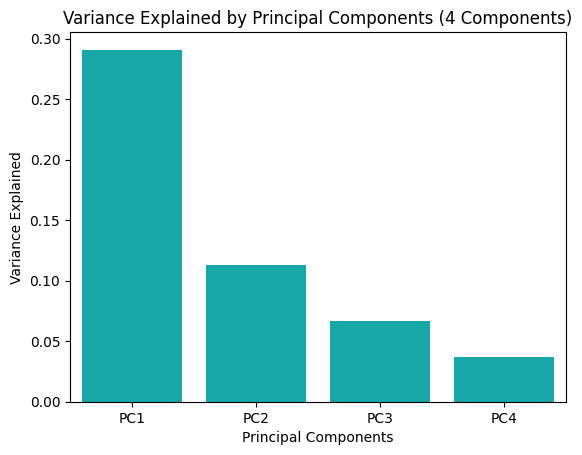

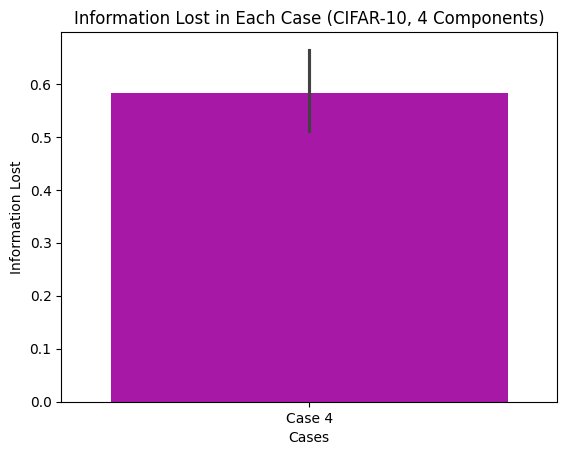

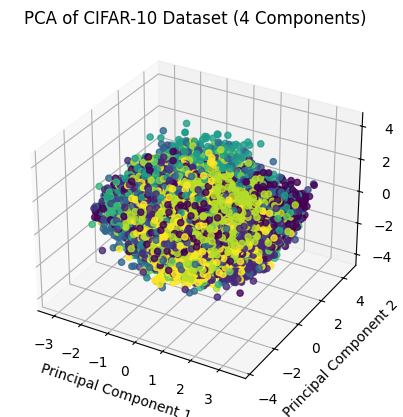

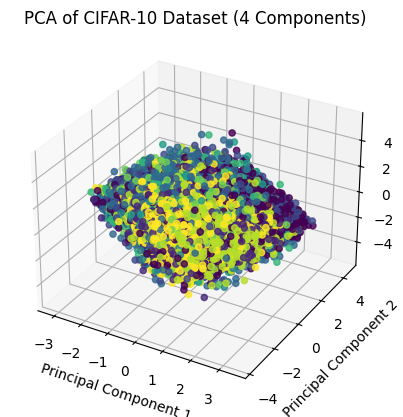


Dataset: CIFAR-10, Number of Components: 5
Variance ratio: [0.29076797 0.11253219 0.06694479 0.03676511 0.03608895]
Sum: 0.543099008500576


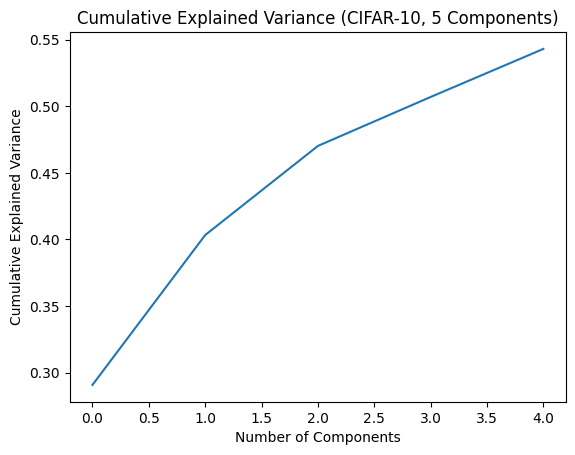

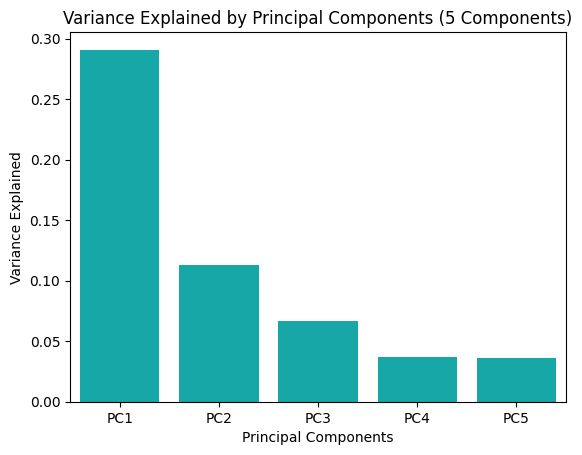

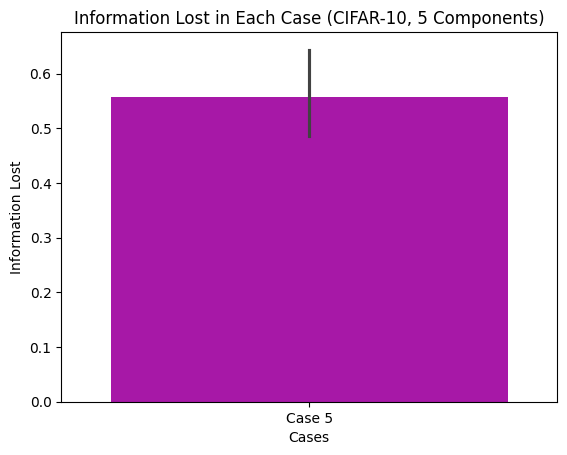

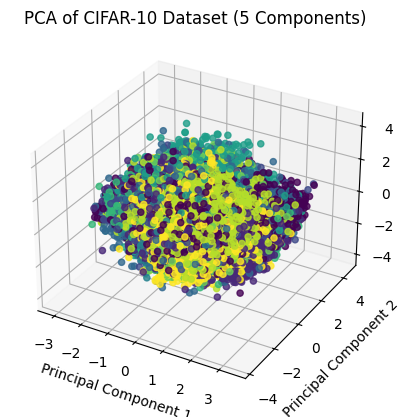

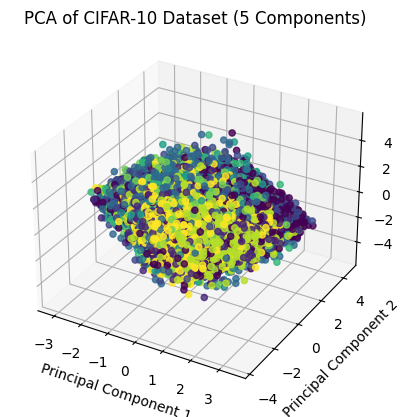

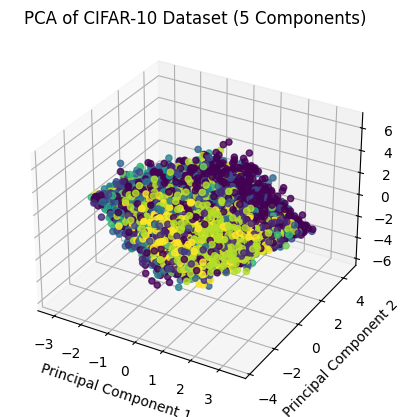

In [9]:
for data, labels, dataset_name in datasets:
    for n_components in range(2, 6):
        # Apply PCA
        pca = PCA(n_components=n_components, whiten=True)
        pca.fit(data)
        x_pca = pca.transform(data)

        # Explained variance ratio
        print(f"\nDataset: {dataset_name}, Number of Components: {n_components}")
        print("Variance ratio:", pca.explained_variance_ratio_)
        print("Sum:", sum(pca.explained_variance_ratio_))

        # Plot cumulative explained variance
        plot_cumulative_explained_variance(pca, dataset_name, n_components)

        # Plot variance explained by each principal component
        plot_variance_explained(pca, n_components)

        # Plot information lost
        plot_information_lost(pca, dataset_name, n_components)

        # Plot data points in the reduced dimensional space
        plot_pca_results(x_pca, labels, dataset_name, n_components)

In [10]:
#Task 3

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from keras.datasets import cifar10

In [12]:
breast_cancer = load_breast_cancer()
X_bc = breast_cancer.data

In [13]:
scaler_bc = StandardScaler()
X_bc_scaled = scaler_bc.fit_transform(X_bc)

In [14]:
(_, _), (X_cifar, _) = cifar10.load_data()

In [15]:
n_samples_cifar = len(X_cifar)
X_cifar_reshaped = X_cifar.reshape(n_samples_cifar, -1).astype('float32') / 255.0

datasets = [(X_bc_scaled, 'Breast Cancer'), (X_cifar_reshaped, 'CIFAR-10')]

In [16]:
variance_cases = [0.90, 0.80, 0.70, 0.60, 0.50]
n_components_list = []

for data, dataset_name in datasets:
    n_components_case = []
    for var in variance_cases:
        pca = PCA(n_components=var)
        pca.fit(data)
        n_components_case.append(pca.n_components_)
    n_components_list.append(n_components_case)


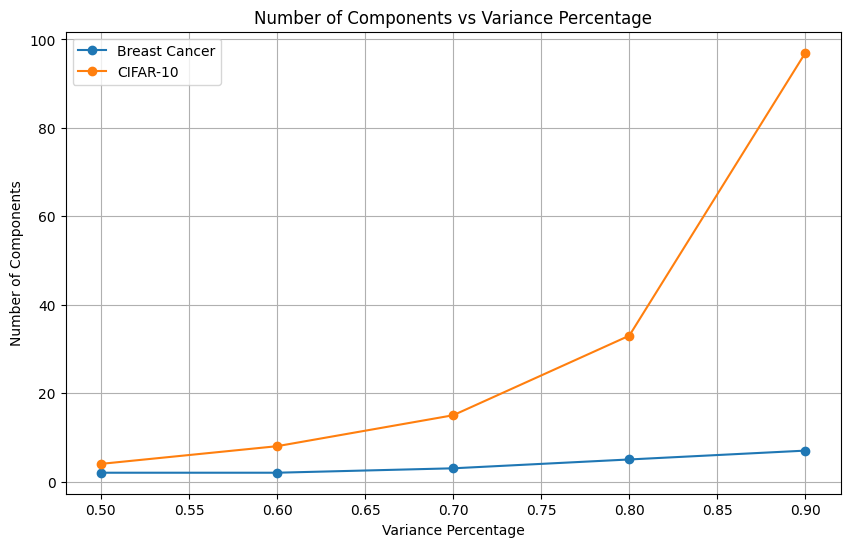

In [17]:
plt.figure(figsize=(10, 6))
for i, dataset_name in enumerate(['Breast Cancer', 'CIFAR-10']):
    plt.plot(variance_cases, n_components_list[i], marker='o', linestyle='-', label=dataset_name)
plt.title('Number of Components vs Variance Percentage')
plt.xlabel('Variance Percentage')
plt.ylabel('Number of Components')
plt.legend()
plt.grid(True)
plt.show()